## EARLY STAGE DIABETES RISK PREDICTION
    Age: Age of the individual (1.20-65)
    Sex: Gender of the individual (1. Male, 2. Female).
    Polyuria: Presence of excessive urination (1. Yes, 2. No).
    Polydipsia: Excessive thirst (1. Yes, 2. No).
    Sudden Weight Loss: Abrupt weight loss (1. Yes, 2. No).
    Weakness: Generalized weakness (1. Yes, 2. No).
    Polyphagia: Excessive hunger (1. Yes, 2. No).
    Genital Thrush: Presence of genital thrush (1. Yes, 2. No).
    Visual Blurring: Blurring of vision (1. Yes, 2. No).
    Itching: Presence of itching (1. Yes, 2. No).
    Irritability: Display of irritability (1. Yes, 2. No).
    Delayed Healing: Delayed wound healing (1. Yes, 2. No).
    Partial Paresis: Partial loss of voluntary movement (1. Yes, 2. No).
    Muscle Stiffness: Presence of muscle stiffness (1. Yes, 2. No).
    Alopecia: Hair loss (1. Yes, 2. No).
    Obesity: Presence of obesity (1. Yes, 2. No).
    Class: Diabetes classification (1. Positive, 2. Negative).

## Data exploration

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('diabetes_risk_prediction_dataset.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
#Reviewing null values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
#Categorical data
df_cat=df[['Gender', 'Polyuria', 'Polydipsia','sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']]
df_cat.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
#Numerical data
df_num=df[['Age']]

In [9]:
cat_vars=['Gender', 'Polyuria', 'Polydipsia','sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity'  ]

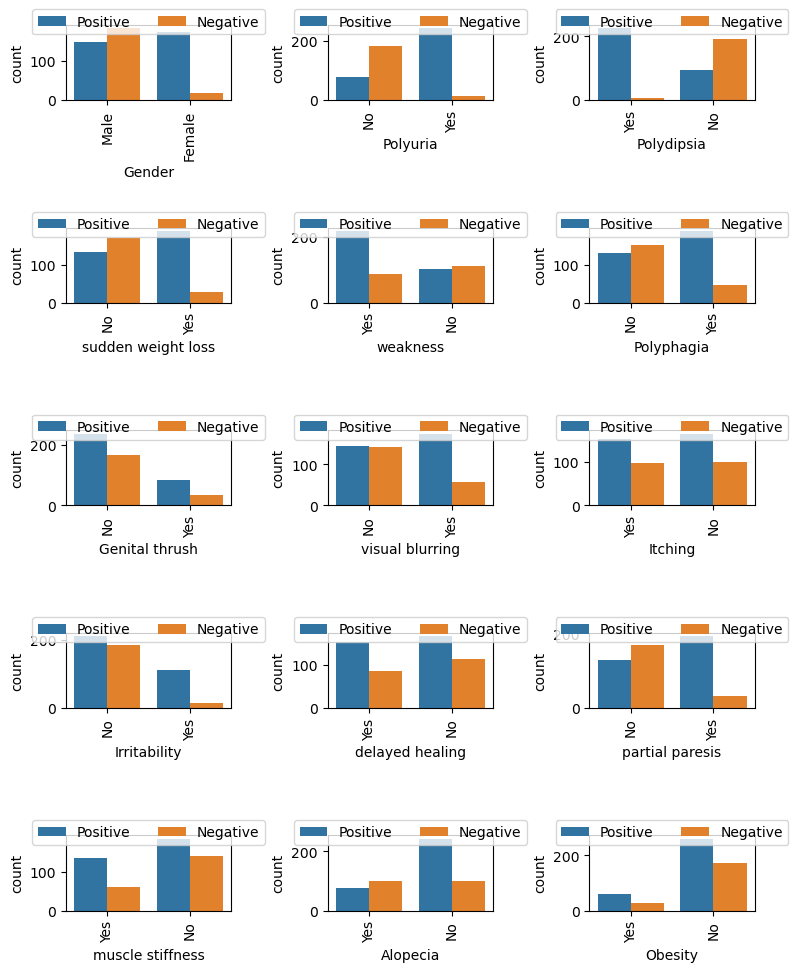

In [10]:
#create count plot
fig, axs= plt.subplots(nrows=5, ncols=3, figsize=(8, 10))
axs= axs.flatten()
#Create a countplot for each categorical variable
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue="class", data = df_cat, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
    
fig.tight_layout()
    
plt.show()

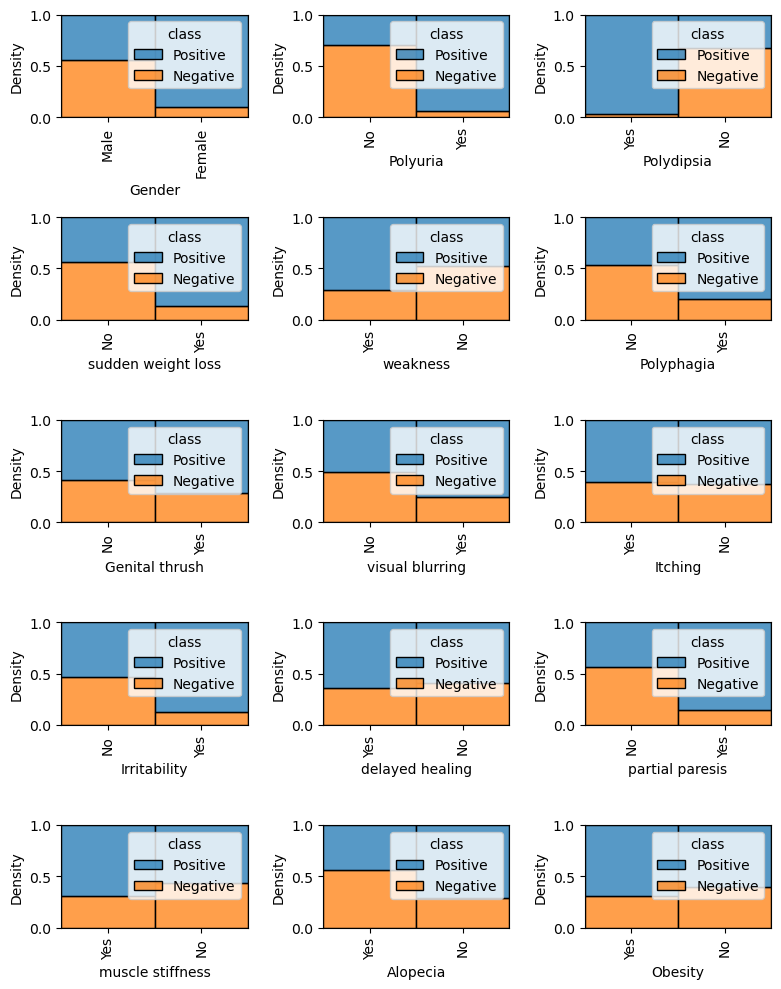

In [11]:
#create hist plot
fig, axs= plt.subplots(nrows=5, ncols=3, figsize=(8, 10))
axs= axs.flatten()
#Create a countplot for each categorical variable
for i, var in enumerate (cat_vars):
    sns.histplot(x=var, hue="class", data = df_cat, ax=axs[i], multiple = "fill", kde = False, element = "bars", fill= True, stat = "density")
    axs[i].set_xticklabels(df_cat[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()
    
plt.show()

Some insights from our data: there are more females with diabetes. It is more probable that someone with polyuria or polydipsia has diabetes. Also, there is a high probability that someone with irritability suffers from diabetes.

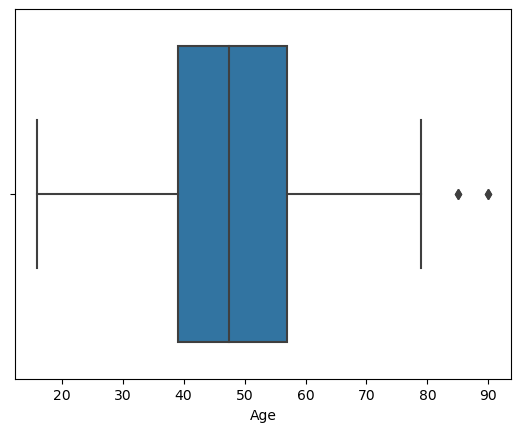

In [12]:
# box plot of num var

sns.boxplot(x="Age", data=df)
        
plt.show()

The age range is between 20 and 80. There are two observations that fall above 80 years, and most of the people in this dataset have ages between 40 and 58.

<Axes: xlabel='Age', ylabel='Count'>

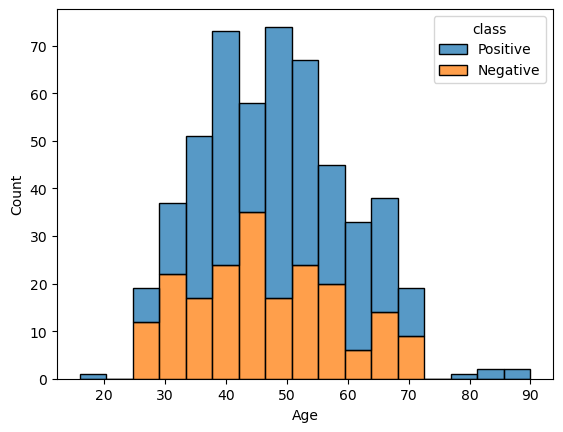

In [13]:
#histogram
sns.histplot(x='Age', hue='class', data=df,multiple="stack")

## Data transformation

In [14]:
#Label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Polyuria']= label_encoder.fit_transform(df['Polyuria'])
df['Polydipsia']= label_encoder.fit_transform(df['Polydipsia'])
df['sudden weight loss']= label_encoder.fit_transform(df['sudden weight loss'])
df['weakness']= label_encoder.fit_transform(df['weakness'])
df['Polyphagia']= label_encoder.fit_transform(df['Polyphagia'])
df['Genital thrush']= label_encoder.fit_transform(df['Genital thrush'])
df['visual blurring']= label_encoder.fit_transform(df['visual blurring'])
df['Itching']= label_encoder.fit_transform(df['Itching'])
df['Irritability']= label_encoder.fit_transform(df['Irritability'])
df['delayed healing']= label_encoder.fit_transform(df['delayed healing'])
df['partial paresis']= label_encoder.fit_transform(df['partial paresis'])
df['muscle stiffness']= label_encoder.fit_transform(df['muscle stiffness'])
df['Alopecia']= label_encoder.fit_transform(df['Alopecia'])
df['Obesity']= label_encoder.fit_transform(df['Obesity'])
df['class']= label_encoder.fit_transform(df['class'])

In [15]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [16]:
#sns.pairplot(data=df, hue='class')

class
1    320
0    200
Name: count, dtype: int64

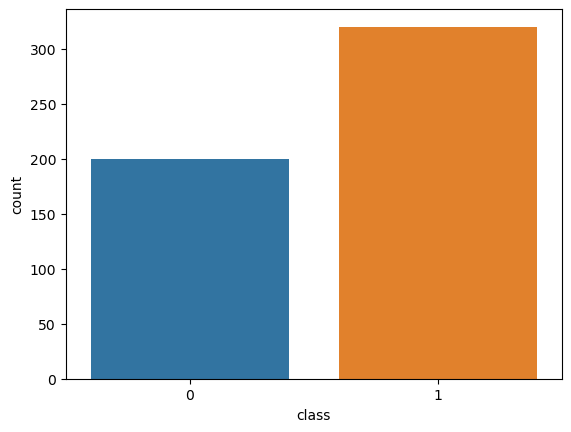

In [17]:
#balancing the labels from class 
sns.countplot(x=df['class'])
df['class'].value_counts()

In [18]:
from sklearn.utils import resample
#Create two dataframes one with majority and minority labels
df_majority = df[(df['class']==1)] 
df_minority = df[(df['class']==0)] 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 320, #to make it match with majority 
                                 random_state=0)   

# combine data
df_unsampled = pd.concat([df_minority_upsampled, df_majority])

class
0    320
1    320
Name: count, dtype: int64

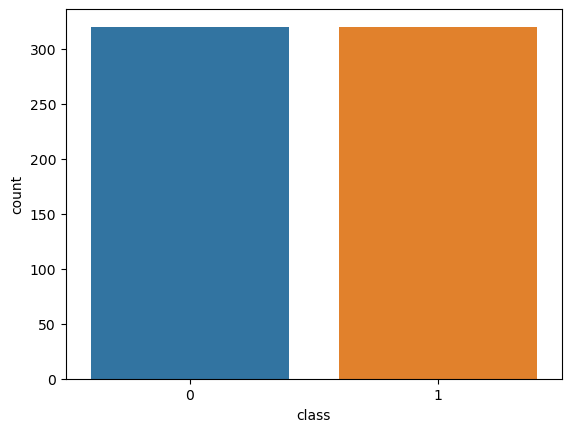

In [19]:
sns.countplot(x=df_unsampled['class'])
df_unsampled['class'].value_counts()

<Axes: >

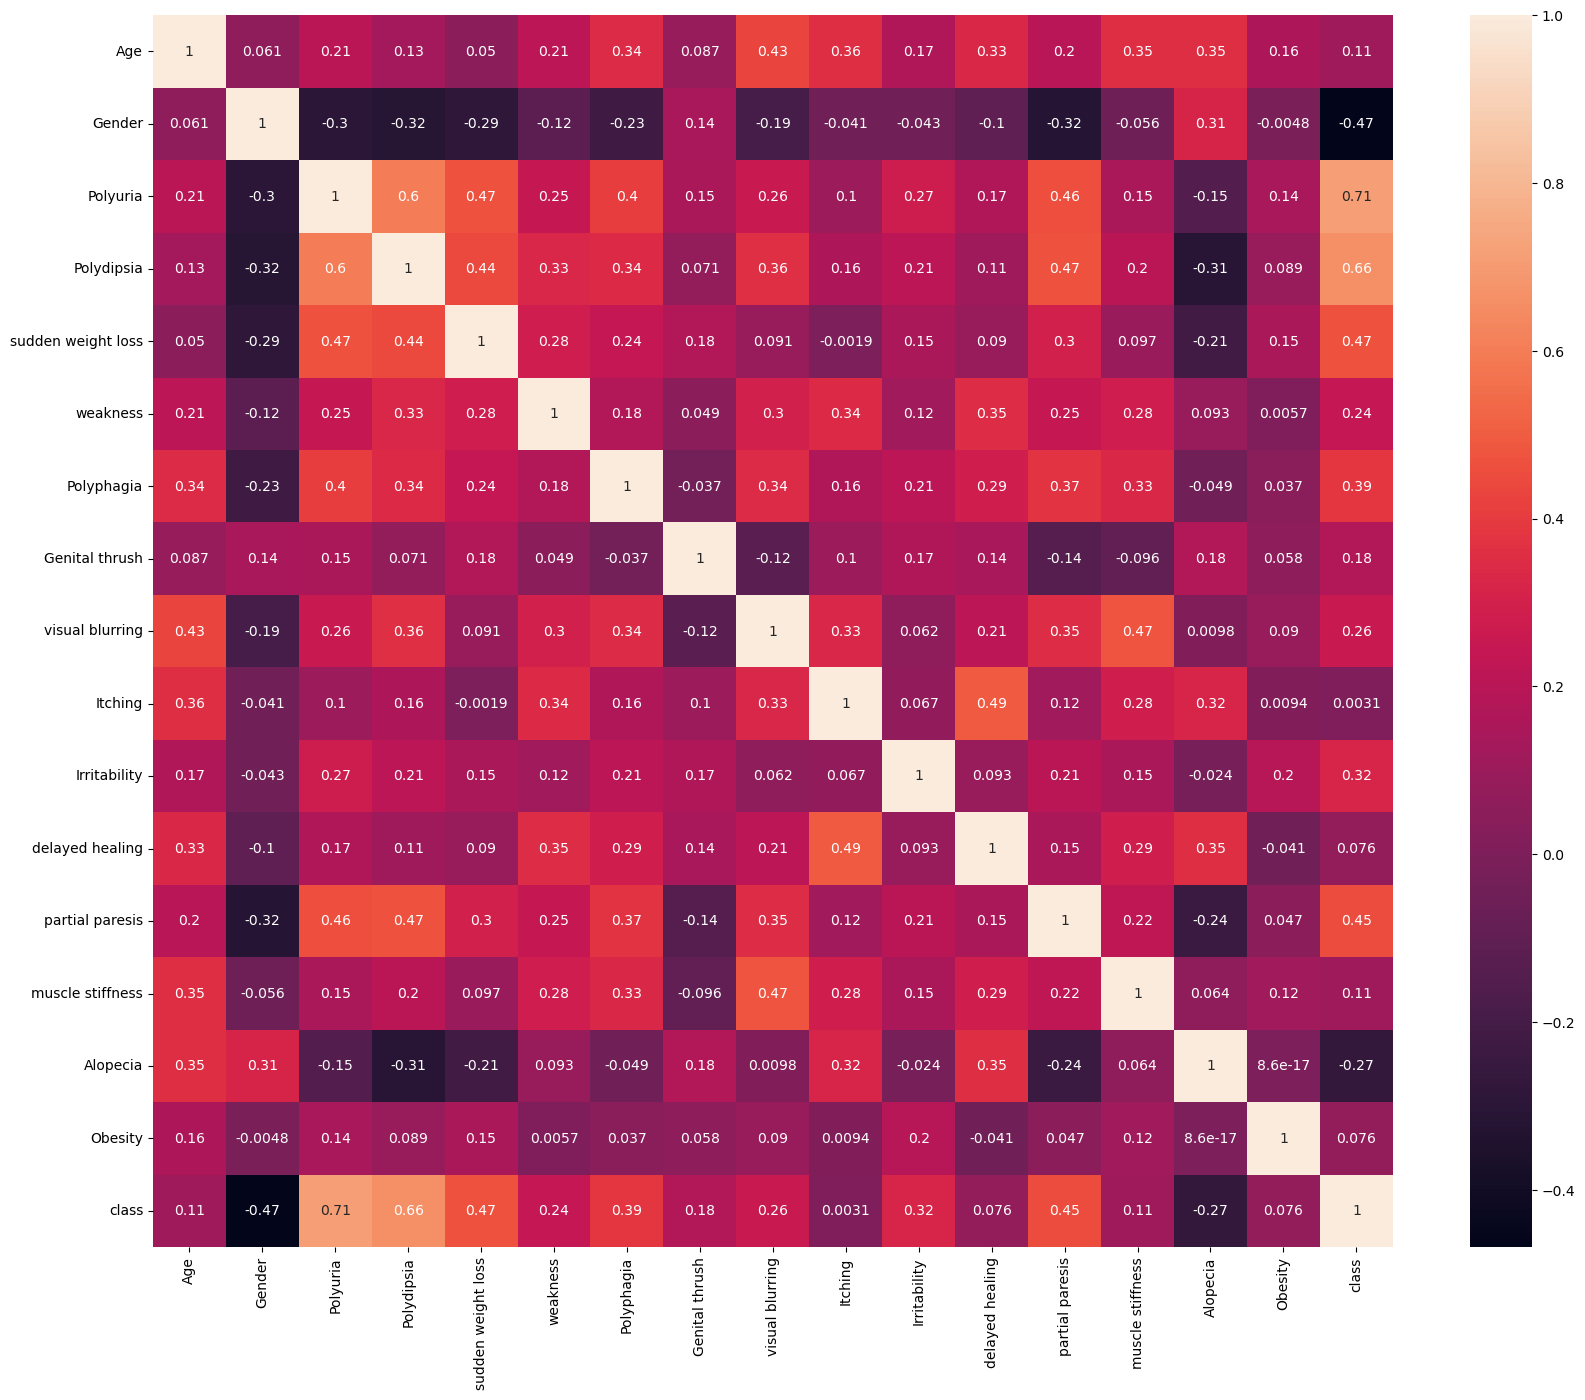

In [20]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_unsampled.corr(), fmt='.2g', annot=True)

In [21]:
#Define the vector of characteristics and target variable
x = df_unsampled.drop('class', axis=1)
y = df_unsampled['class']

In [22]:
#divide the dataset on training and tests datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

## Decision Tree model

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
#making prediction with CLF gini
y_pred_gini=clf_gini.predict(x_test)

In [25]:
print('Precision in training set:{:.2f}'. format(clf_gini.score(x_train, y_train)))
print('Precision in test set:{:.2f}'. format(clf_gini.score(x_test, y_test)))

Precision in training set:0.89
Precision in test set:0.88


Performance metrics

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 score: ', (f1_score(y_test, y_pred_gini, average='micro')))
print('Precision score: ', (precision_score(y_test, y_pred_gini, average='micro')))
print('Recall score: ', (recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard score: ', (jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 score:  0.8802083333333334
Precision score:  0.8802083333333334
Recall score:  0.8802083333333334
Jaccard score:  0.786046511627907


    88% of the patients predicted as having diabetes actually have the condition (presicion socore). A high precision would mean a low number of false positive predictions, reducing the chances of misdiagnosing someone as having diabetes when they do not.
    88% of the patients are correctly identified as having the condition (Recall score)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        92
           1       0.90      0.87      0.88       100

    accuracy                           0.88       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.88      0.88       192



<Figure size 900x900 with 0 Axes>

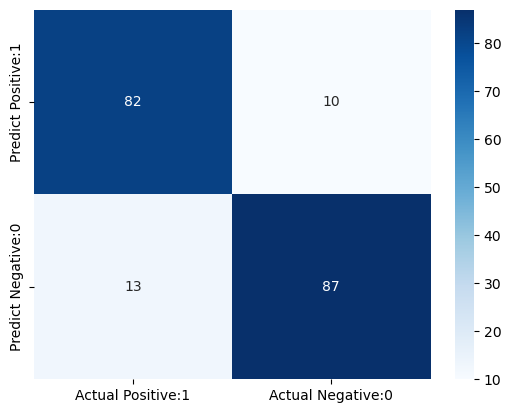

<Figure size 900x900 with 0 Axes>

In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_gini)
cm_matrix= pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                          index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

[Text(0.5769230769230769, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 448\nvalue = [228, 220]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 0.5\ngini = 0.336\nsamples = 272\nvalue = [214, 58]'),
 Text(0.15384615384615385, 0.375, 'x[14] <= 0.5\ngini = 0.492\nsamples = 57\nvalue = [25, 32]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.46153846153846156, 0.375, 'x[10] <= 0.5\ngini = 0.213\nsamples = 215\nvalue = [189, 26]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.119\nsamples = 189\nvalue = [177, 12]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(0.8461538461538461, 0.625, 'x[3] <= 0.5\ngini = 0.146\nsamples = 176\nvalue = [14, 162]'),
 Text(0.7692307692307693, 0.375, 'x[9] <= 0.5\ngini = 0.403\nsamples = 50\nvalue = [14, 36]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.

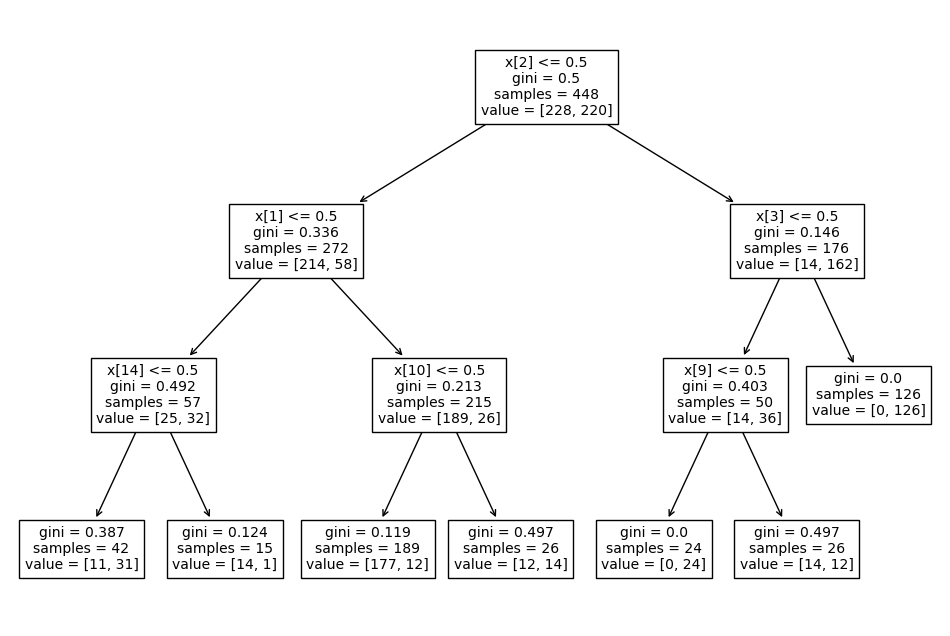

In [29]:
#Tree visualization
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))

In [30]:
import pydotplus
import graphviz 
%matplotlib inline

In [31]:
#conda install -c anaconda pydotplus

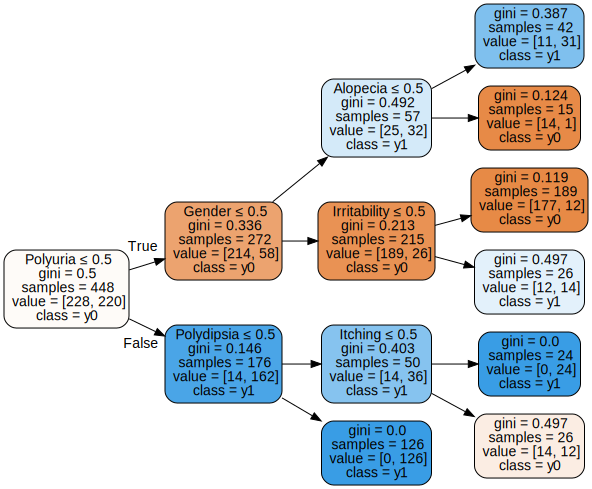

In [32]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=x_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

We can observe that Polyuria, Polydipsia, Gender, Alopecia, Irritability, and Itching are the most relevant variables that directly impact the target variable. In general, we could consider the decision tree model to predict with high reliability whether a patient could have diabetes.

## Logistic Regression

In [33]:
#Define the vector of characteristics and target variable
x = df_unsampled.drop('class', axis=1)
y = df_unsampled['class']

In [34]:
#divide the dataset on training and tests datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(random_state=0)
LR.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred= LR.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 94.27 %


In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9427083333333334
Precision Score :  0.9427083333333334
Recall Score :  0.9427083333333334
Jaccard Score :  0.8916256157635468


94% of the patients predicted as having diabetes actually have the condition (presicion socore). A high precision would mean a low number of false positive predictions, reducing the chances of misdiagnosing someone as having diabetes when they do not.
94% of the patients are correctly identified as having the condition (Recall score)

In [39]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        92
           1       0.97      0.92      0.94       100

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

<Figure size 900x900 with 0 Axes>

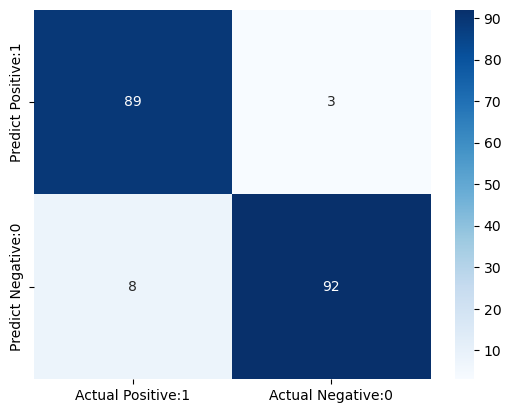

<Figure size 900x900 with 0 Axes>

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [42]:
#ROC Curve
y_pred_prob = LR.predict_proba(x_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

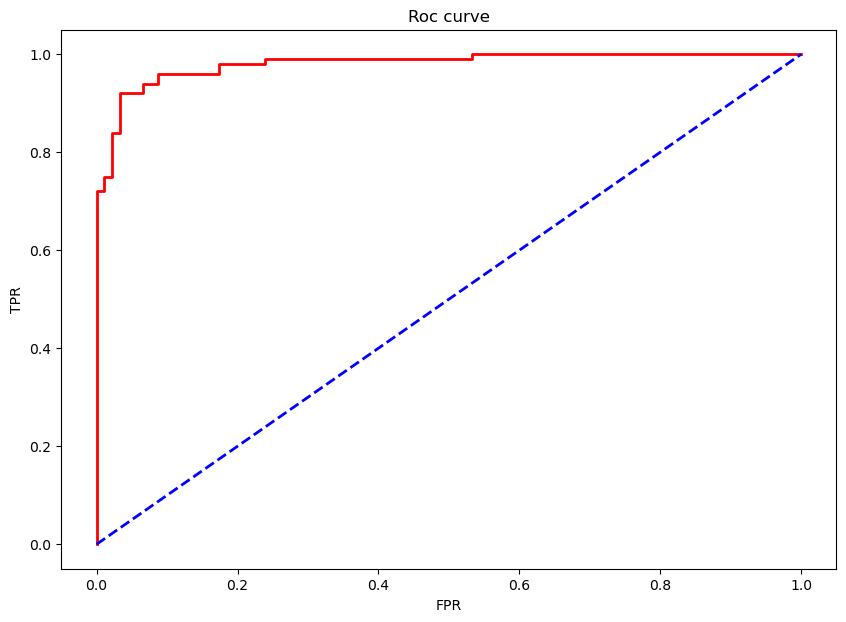

In [43]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Add ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [52]:
#Extract Coefficients
print('Intercept: ' + str(LR.intercept_))
print('Coefficients (5 largest) ')
summary = pd.DataFrame([x_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary.head(5)


Intercept: [0.73116614]
Coefficients (5 largest) 


,Variable,Coefficient
2,Polyuria,2.70637
3,Polydipsia,2.578198
10,Irritability,1.5234
6,Polyphagia,1.379316
7,Genital thrush,1.359302


In summary, the logistic regression model's performance on the training data is excellent, but it fails to generalize well to new data (overfitting). When comparing the previous two models, I would select the decision tree model since it gives us a good F1 score, and we have 88% confidence in its predictions.